KNN- predict whether person will have diabetes or not

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# values of columns like 'Glucose', 'BloodPressure' cannot be accepted as zeroes
# becasue it will affect the outcome. we can replcae such values with the mean of the respective column:

# Replace zeros
zero_not_accpeted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for column in zero_not_accpeted:
    df[column] = df[column].replace(0,np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)
    

In [5]:
# let's spilit dataset to train and test

X = df.iloc[:,0:8] # the column is gonna be from 0 to 7, so column 8 is not included
y = df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0 , test_size=0.2)


In [6]:
# feature Scaling:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [7]:
# to get an estimate number for K
import math
math.sqrt(len(y_test))

12.409673645990857

In [8]:
# define the model using KNN clasifier and fir the train data in the model

# Define the model: Init K_NN
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
# Fit model
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [9]:
# it's important to evaluate the model
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [15, 32]])

In [10]:
f1_score(y_test,y_pred)

0.6956521739130436

In [12]:
accuracy_score(y_test,y_pred)
# accuracy of 80% tells us that it is pretty fair fit in the model.

0.8181818181818182

## SVM Classifier

In [13]:
from sklearn.svm import SVC

svc = SVC(kernel = "rbf", random_state= 4)
svc.fit(X_train,y_train)
y_pred_svm = svc.decision_function(X_test)

## Logostic Classifier

In [15]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train,y_train)
y_pred_logistic = logistic.decision_function(X_test)

### Plot ROC and compare AUC

In [18]:
from sklearn.metrics import roc_curve, auc

# the roc_curve function will return 3 things, first False Positive Rate which is stored in
# logistic_fpr, True Positive Rate which is in logistic_tpr and threshold.
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr,logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test,y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)


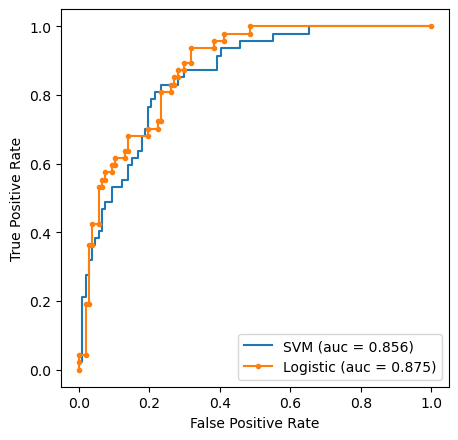

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr,svm_tpr, linestyle='-', label='SVM (auc = %0.3f)'% auc_svm)
plt.plot(logistic_fpr,logistic_tpr, marker='.', label='Logistic (auc = %0.3f)'% auc_logistic)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
